In [31]:
import numpy as np 
import matplotlib.pyplot as plt
import math

![alt text](rectangular_microstrip_patch_antenna.png "rectangular_microstrip_patch_antenna")

In [44]:
# dimensions for the patch
L = 0.03803
wp = 0.0283
M_w = 0.003
M_L = 0.0129022
L_L = L_R = 0.016015
half_L = 0.019015
W_start_off = 0.0048006 
W= wp+W_start_off
curvedin_width = W_start_off + 0.0081016
y0 = 0
x0 = 0

nb_element = 10

off_set = 0.006 


In [45]:

#1-1 Create Nodes 
#conors = [[0,0],[0,1],[1,0],[1,1]]

nodes = []
 
#all nodes
for x in np.linspace(x0, L, num=nb_element): 
    for y in np.linspace(y0, W, num=nb_element): 
        nodes.append([x,y])

In [50]:
        
#remove unwanted nodes
print(W_start_off + off_set)


p = [] # to be used later in Delaunay, points in unwanted region
for node in nodes:
    if (node[0]<L_L) and (node[1]<(W_start_off + off_set)):
        p.append(node)
        nodes.remove(node)
    
    if (node[0]>(L-L_R)) and (node[1]<(W_start_off + off_set)):
        p.append(node)
        nodes.remove(node)
    
                                                     

0.0108006


In [47]:
# remove
print(L_L)
print(half_L-(M_w/2))
print(curvedin_width)
for node in nodes:  
    if (node[0]>L_L) and (node[0]<(half_L-(M_w/2))) and (node[1]<curvedin_width):
        print(node)
        #nodes.remove(node)

0.016015
0.017515
0.0129022
[0.01690222222222222, 0.0]
[0.01690222222222222, 0.0036778444444444443]
[0.01690222222222222, 0.007355688888888889]
[0.01690222222222222, 0.011033533333333333]


In [48]:
#for node in nodes:
 #   print(node)


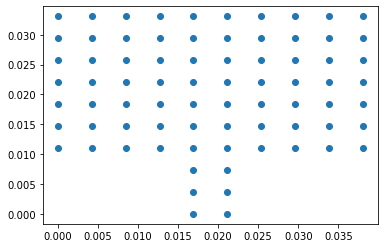

In [51]:
#1-2 Display Nodes of normal feed antenna

points = np.array(nodes)

plt.plot(points[:,0],points[:,1],'o')
plt.show()

In [52]:
#2- Create Elements
from scipy.spatial import Delaunay
tri = Delaunay(points)

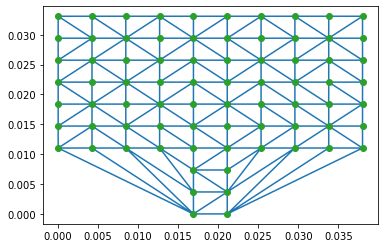

In [53]:
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o') 
plt.show()

In [54]:
tri.simplices

array([[28,  7,  0],
       [14,  7, 28],
       [62, 38, 69],
       [29, 14, 28],
       [62, 55, 38],
       [29, 21, 14],
       [30, 21, 29],
       [55, 39, 38],
       [48, 39, 55],
       [39, 48, 40],
       [31, 21, 30],
       [48, 41, 40],
       [73, 66, 72],
       [72, 66, 65],
       [15, 23, 16],
       [23, 15, 22],
       [23, 34, 24],
       [34, 23, 33],
       [23, 17, 16],
       [17, 23, 24],
       [11, 17, 18],
       [17, 11, 10],
       [11,  4,  3],
       [11,  3, 10],
       [71, 72, 65],
       [64, 71, 65],
       [71, 63, 70],
       [63, 71, 64],
       [70, 63, 69],
       [63, 62, 69],
       [63, 57, 56],
       [63, 64, 57],
       [57, 50, 56],
       [50, 49, 56],
       [63, 55, 62],
       [55, 63, 56],
       [32, 23, 22],
       [23, 32, 33],
       [43, 34, 33],
       [34, 43, 44],
       [32, 43, 33],
       [43, 32, 42],
       [50, 43, 49],
       [49, 43, 42],
       [ 8,  1,  0],
       [ 7,  8,  0],
       [ 8,  7, 14],
       [15,  

In [76]:
#Create a set of points on the generated Delaunay that are not needed
 # already done in step earlier
print(p)
#Find the elements which contain those points
tri.find_simplex(p)

[[0.0, 0.0036778444444444443], [0.004225555555555555, 0.0036778444444444443], [0.00845111111111111, 0.0036778444444444443], [0.012676666666666666, 0.0036778444444444443], [0.025353333333333332, 0.0036778444444444443], [0.029578888888888887, 0.0036778444444444443], [0.03380444444444444, 0.0036778444444444443], [0.03803, 0.0036778444444444443]]


array([-1, -1, -1,  0,  4, -1, -1, -1], dtype=int32)

In [77]:
#Create a new set of elements without the problematic elements
mesh = np.delete(tri.simplices,[0, 4],0)

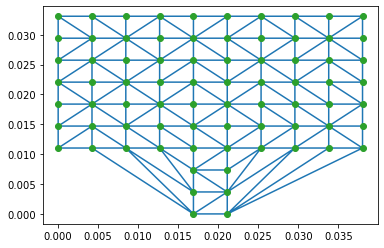

In [78]:
plt.triplot(points[:,0], points[:,1], mesh)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

In [14]:
#3- Export into a file
nb_nodes = len(points)
nb_elements = len(mesh)

file = open("plate_mesh.dat","w")
file.write("{} {}\n".format(nb_nodes,nb_elements))
for i,node in enumerate(Nodes):
    file.write("{} {} {}\n".format(i,node[0],node[1])) 
for j,elem in enumerate(mesh):
    file.write("{} {} {} {}\n".format(j,elem[0],elem[1],elem[2]))
file.close()

In [15]:
nb_nodes = len(points)
nb_elements = len(mesh)

for j,elem in enumerate(mesh):
    print("{} {} {} {}\n".format(j,elem[0],elem[1],elem[2]))

0 8 22 23

1 7 6 21

2 22 7 21

3 7 22 8

4 9 8 23

5 35 36 21

6 36 35 51

7 20 35 21

8 5 20 6

9 6 20 21

10 18 17 33

11 34 18 33

12 18 4 3

13 17 18 3

14 43 28 42

15 42 28 0

16 28 14 0

17 2 17 3

18 2 16 17

19 19 18 34

20 20 19 35

21 19 20 5

22 19 5 4

23 18 19 4

24 26 12 11

25 41 26 40

26 15 31 16

27 14 15 0

28 28 45 46

29 30 15 14

30 15 30 31

31 2 1 16

32 15 1 0

33 1 15 16

34 22 37 23

35 37 38 23

36 37 22 36

37 38 24 23

38 9 24 10

39 24 9 23

40 12 27 13

41 26 27 12

42 27 26 41

43 47 30 46

44 30 47 31

45 44 28 43

46 44 45 28

47 28 29 14

48 29 30 14

49 29 28 46

50 30 29 46

51 37 52 38

52 52 36 51

53 52 37 36

54 55 41 40

55 54 55 40

56 39 24 38

57 39 54 40

58 47 48 31

59 52 53 38

60 53 39 38

61 39 53 54

62 26 25 40

63 25 39 40

64 39 25 24

65 25 26 11

66 25 11 10

67 24 25 10

68 48 32 31

69 31 32 16

70 17 32 33

71 16 32 17

72 49 34 33

73 32 49 33

74 49 32 48

75 49 50 34

76 35 50 51

77 50 35 34

78 56 43 42

79 43 56 57

8